# Laboratory 2 - Statistics (Kate Moo, mooka)

# Exercise 1

In [1]:
#import appropriate libraries
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import HTML
from scipy.misc import factorial

In [2]:
# easy way to re-size a figure
# set plots in-line
%matplotlib inline
rc('figure', figsize=(11.0, 9.0)) 
rc('animation', html='html5')

In [3]:
# create a function that counts the running total of occurrences in which 
#   heads land 1,2,...5 times out of 5 coin tosses. Plot the function, 
#   with counts/N as the y axis, to denote probability
#   N denotes the number of times the coin was flipped and M denotes
#   the number of times the coin is tossed, while N is the number of coins
def PNx(N,M):
    counts = np.zeros(N+1)
    for i in range(0,M):
        draw = np.random.randint(2, size=N+1)
        heads_count = len(draw[(np.where(draw == 1))])
        tails_count = len(draw[(np.where(draw == 0))])
        counts[heads_count] += 1
        PNx = counts / M
    return PNx

In [28]:
# find analytic prediction using inputs N number of trials and p probability
def PNxBinom(N,p):
    x = (np.arange(N+1))
    PNxBinom = factorial(N)/((factorial(x)*factorial(N-x)))*((p)**N)
    return PNxBinom

C:\Users\katie\Anaconda\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: `factorial` is deprecated!
Importing `factorial` from scipy.misc is deprecated in scipy 1.0.0. Use `scipy.special.factorial` instead.
  after removing the cwd from sys.path.


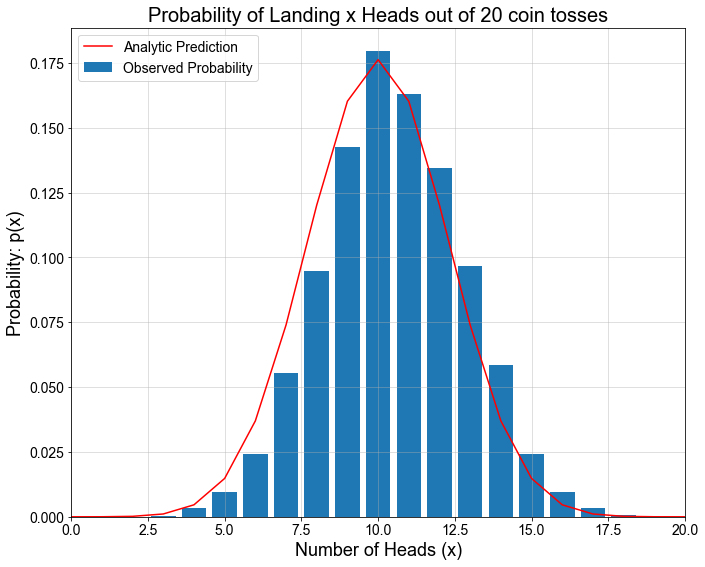

In [113]:
# plot both experimental PNx and binomial PNx to compare
# bar graph is the experimental PNx
# line graph is the analytical prediction
plt.bar(np.arange(21), PNx(20,10000), label="Observed Probability")
plt.plot(np.arange(21), PNxBinom(20,0.5), color='red', label="Analytic Prediction")

# customize plot appearance and include legend
plt.title("Probability of Landing x Heads out of 20 coin tosses", fontsize=20)
plt.xlabel("Number of Heads (x)",fontsize=18)
plt.xlim(0,20)
plt.ylabel("Probability: p(x)",fontsize=18)
plt.grid(alpha=0.5)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.rcParams['font.sans-serif'] = "Arial"
plt.rcParams['font.family'] = "sans-serif"
plt.legend(loc='upper left', fontsize=14)

In [82]:
# calculate expectation value with N=20 and a 'while' loop to iterate through trials
Ex = 0
i = 0
while i <= 20:
    Ex += i * (PNx(20,1000)[i])
    i += 1
print(Ex)

# compare expectation value to analytical mean given that aMean = p * N
aMean = 0.5 * 20
print(Ex)

10.654000000000002
10.654000000000002


In [7]:
# find expectation value with N=40 and a 'while' loop to iterate through trials
Ex = 0.
i = 0
while i <= 40:
    Ex += i * (PNx(40,1000)[i])
    i += 1
print(Ex)

# compare expectation value to analytical mean
aMean = 0.5 * 40
print(aMean)

20.849
20.0


# Exercise 2

In [8]:
# recreate analytical PNx function, but with np.random.random instead of np.random.randint to simulate a 'weighted' coin
# with N number of trials, p probability, and M times the coin is tossed
def PNxAna(N,M,p):
    counts = np.zeros(N+1)
    for i in range(0,M):
        draw = np.random.random(size=N+1)
        heads_count = len(draw[(np.where(draw <= p))])
        tails_count = len(draw[(np.where(draw > p))])
        counts[heads_count] += 1
        PNx = counts / M
    return PNx


In [17]:
# find analytic binomial prediction with a variable value of p (we will make this small)    
def PNxBinomAna(N,p):
    x = (np.arange(N+1))
    PNxBinomAna = factorial(N)/((factorial(x)*factorial(N-x)))*(p**x)*(1-p)**(N-x)
    return PNxBinomAna

C:\Users\katie\Anaconda\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: `factorial` is deprecated!
Importing `factorial` from scipy.misc is deprecated in scipy 1.0.0. Use `scipy.special.factorial` instead.
  after removing the cwd from sys.path.


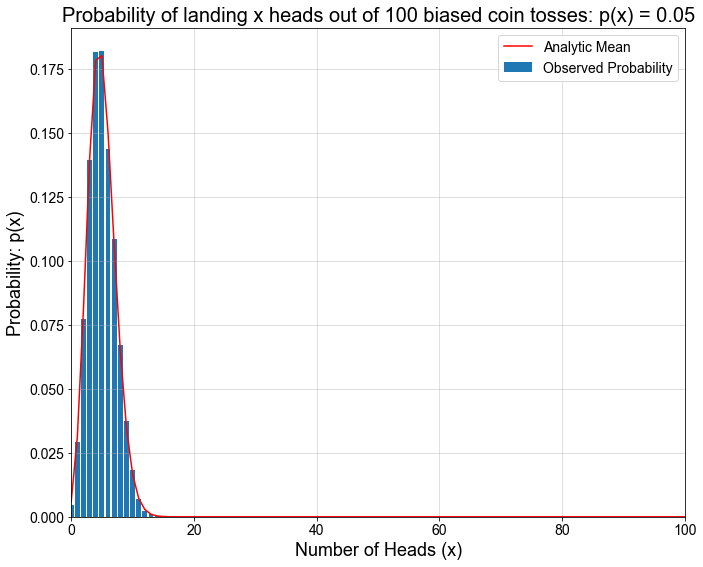

In [114]:
# plot both experimental PNx and binomial PNx to compare
# bar graph is the experimental PNx
# line graph is the analytical prediction
plt.bar(np.arange(101), PNxAna(100,10000,0.05), label="Observed Probability")
plt.plot(np.arange(101), PNxBinomAna(100,0.05), color='red', label="Analytic Mean")

# customize plot appearance and include legend
plt.xlabel("Number of Heads (x)",fontsize=18)
plt.xlim(0,100)
plt.ylabel("Probability: p(x)",fontsize=18)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.grid(alpha=0.5)
plt.legend(loc='upper right', fontsize=14)

In [11]:
# find expectation value of this particular distribution with N=20
Ex = 0
i = 0
while i <= 20:
    Ex += i * (PNxBinomAna(20,0.05)[i])
    i += 1
print(Ex)

#compare expectation value to analytical mean
aMean = 0.05 * 20
print(aMean)

0.9999999999999992
1.0


C:\Users\katie\Anaconda\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: `factorial` is deprecated!
Importing `factorial` from scipy.misc is deprecated in scipy 1.0.0. Use `scipy.special.factorial` instead.
  after removing the cwd from sys.path.


In [130]:
# create functions to calculate var(x) and mean(x) for various N,p values
# variance can also be calculated as (N*p*(1-p))
# input = probability (p), number of trials (N)
# outputs = var(x) and mean(x)

def binomVar(N,p):
    i = 0
    var = 0.0
    while i <= N:
        var = i * p * (1-p)
        i += 1
    return var

def binomMean(N,p):
    aMean = 0.0
    aMean = N*p
    return aMean

In [131]:
# iterate through a variety of p values to make an array of Ex (to plot against p)
p = 0.0
varArray = []
while p <= 0.5:
    varArray.append(binomVar(20,p))
    p += 0.01

# iterate through a variety of p values to make an array of aMean (to plot against p)
p = 0.0
meanArray = []
while p <= 0.5:
    meanArray.append(binomMean(20,p))
    p += 0.01

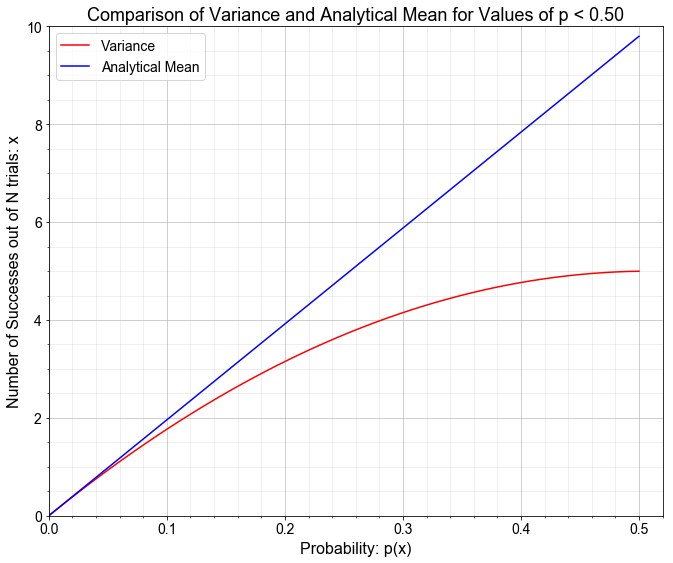

In [132]:
# plot variance vs analytical mean as line graphs
# red line is the variance change with p
# blue lines is the analytical mean with p
plt.figure()
p = np.linspace(0,0.5,50)
plt.plot(p,varArray,color="red", label="Variance")
plt.plot(p,meanArray,color="blue", label="Analytical Mean")

# customize plot appearance and include legend
plt.title("Comparison of Variance and Analytical Mean for Values of p < 0.50", fontsize=18)
plt.xlabel("Probability: p(x)",fontsize=16)
plt.xlim(0,0.52)
plt.ylim(0,10)
plt.ylabel("Number of Successes out of N trials: x",fontsize=16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.grid(alpha=0.75)
plt.minorticks_on()
plt.grid(which='minor', alpha=0.25)
plt.legend(loc='upper left', fontsize=14)